## 1. Importing libraries

In [1]:
import numpy as np                                     #Numerical Operations
import pandas as pd                                    #Data Analysis
import matplotlib.pyplot as plt                        #Visualisation
import seaborn as sns                                  #
from sklearn.model_selection import train_test_split   #Splitting of our data inot train and test 
from sklearn.linear_model import LinearRegression      #For Modelling

## 2. Loading the data

In [3]:
companies=pd.read_csv(r"C:\Users\roopa\Desktop\Veeraraju_Elluru\Veer_Trainings\Python, AIML, DS\AIML\1000_Companies.csv")
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


## 3. Data Wrangling

In [4]:
companies.info() #we are able to detect issues with the data, i.e, the column 'State' is of object dtype vizn't useful
#for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [8]:
companies['State'].unique() #this column has only categorical variables, it will be useful for data analysis iff
#converted into numerical format, can be done directly using sklearn

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
companies['State']=companies['State'].astype('category')

In [14]:
 companies['State']=companies['State'].cat.codes #numerical values from 0,1 etc and they are assigned alphabetically

In [15]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


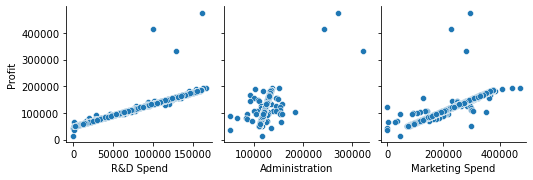

In [16]:
sns.pairplot(companies, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars=['Profit']) #bulk checking for
#linear relationship

In [17]:
companies.iloc[:,:-2].corr() #checking for multicollinearity
#RnD Spend and the Marketing Spend have corr >0.75, hence it shd be treated before further analysis, kept for later 

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


## 4. Splitting data into IV and DV

In [19]:
X=companies.iloc[:,:-2].values
Y=companies.iloc[:,4]
X,Y

(array([[165349.2 , 136897.8 , 471784.1 ],
        [162597.7 , 151377.59, 443898.53],
        [153441.51, 101145.55, 407934.54],
        ...,
        [100275.47, 241926.31, 227142.82],
        [128456.23, 321652.14, 281692.32],
        [161181.72, 270939.86, 295442.17]]),
 0      192261.83000
 1      191792.06000
 2      191050.39000
 3      182901.99000
 4      166187.94000
            ...     
 995     95279.96251
 996    164336.60550
 997    413956.48000
 998    333962.19000
 999    476485.43000
 Name: Profit, Length: 1000, dtype: float64)

## 5. Splitting data into train and test data

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.20,random_state=9) #random_state can have any value
#and order of mentioning X,Y and repective train and test is also important

In [21]:
len(X_train)
# len(X_test)
# len(Y_train)
# len(Y_test)

800

## 6. Modelling

In [24]:
#Calling and giving the model used, some name
lin_reg=LinearRegression()

#Fitting the data
lin_reg.fit(X_train, Y_train)

#Testing/Predicting the output of the data
Y_pred=lin_reg.predict(X_test) #predict the outcomes for remaining X data, based on what it has learned from the X_train
Y_pred #will print out all the outputs that it predcits for the inputs in X_test
#the names like lin_reg, Y_pred are just conventions
#lin_reg=LinearRegression()       } -
#lin_reg.fit(X_train,Y_train)     } -
#Y_pred=lin_reg.predict(X_test)   } --> let this code snippet be byhearted for the basic modelling type
#Y_pred                           } -

array([157501.50410476,  62745.2686851 , 172190.84630527,  66486.79344514,
       154397.24814569,  54520.87948394, 147081.62769468, 168491.17883748,
        60622.50867317, 168140.09060603,  75483.53732977, 157349.46498183,
        97450.04608473, 129195.77279839, 131783.23359103, 110573.57214331,
       109543.37147854, 140123.92933845, 119804.78081299, 104024.19541898,
       138945.09276841, 166785.28279393,  90376.17252838, 135102.76900601,
        90693.94581238, 169265.96490168, 105713.86119013, 162142.54604012,
       101239.40765813, 159720.80573202, 132286.37469691,  90320.64761251,
        87928.8052827 , 116483.13100281, 150601.05280472, 174460.5338243 ,
        70722.91696625,  68861.55117488, 119691.61659642, 178758.16187195,
       120170.83933467,  71589.10553527, 157897.02601417, 142920.67632061,
       184721.53724812, 181690.73138115, 129689.51739944, 144958.01343942,
       294863.04507557,  98094.13499025, 168351.93942664, 115016.41921244,
       100646.57244664,  

In [25]:
#predicting for some completely new values/dataset
lin_reg.predict([[200000,500000,300000]]) #note the syntax v.carefully, .predict([[dataset acc to the columns]])

array([511383.22280493])

## Evaluation

In [26]:
#we've quite a few methods, one popular metric is r^2 calculation
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) #91.41 % accuracy

0.9141832470808273

In [27]:
#second method for evaluation
def MAPE(a,b): #Mean Absolute Percentage Error, closer the value is to 0, better it is
    return np.mean(np.abs((a-b)/a))*100

In [28]:
MAPE(Y_test,Y_pred)

1.6891794992724312

## -------

In [30]:
# now to treat columns with high correl values, here RnD Spend and Marketting Spend
# one way is to remove either column and check the r2_score and MAPE
# del companies['R&D Spend'], the r2 score is 0.89 and MAPE score is 1.689
companies=pd.read_csv(r"C:\Users\roopa\Desktop\Veeraraju_Elluru\Veer_Trainings\Python, AIML, DS\AIML\1000_Companies.csv")

In [20]:
# del companies['Marketing Spend'], the r2 score is 0.91, and MAPE score is 1.698, so we would overall chose to remove
# Marketing Spend column

In [21]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [22]:
# X1=companies.iloc[:,:2].values
# Y1=companies.iloc[:,3]
# X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1,Y1,test_size=0.20,random_state=9)

In [23]:
# lin_reg1=LinearRegression()
# lin_reg1.fit(X1_train,Y1_train)
# Y1_pred=lin_reg1.predict(X1_test)
# r2_score(Y1_test,Y1_pred)

In [24]:
# MAPE(Y1_test,Y1_pred)